# Covid19India - EDA

Data Description
The dataset consists of the information about Covid19India cases taken from [Covid19India API](https://api.covid19india.org/raw_data.json). 
 
Below is a table showing names of all the columns and their description.
 
| Attributes | Dtype   |
|------|------|
| agebracket | object|
| backupnotes | object|
| contractedfromwhichpatientsuspected | object |
| currentstatus | object |
| dateannounced | object |
| detectedcity | object |
| detecteddistrict | object |
| detectedstate | object |
| estimatedonsetdate | object |
| gender | object |
| nationality | object |
| notes | object |
| patientnumber | object |
| source1 | object |
| source2 | object |
| source3 | object |
| statecode | object |
| statepatientnumber | object |
| statuschangedate | object |
| typeoftransmission | object |

## Import Libraries

In [0]:
import os
from requests import request
import urllib.request
import json
from pandas.io.json import json_normalize

import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline


# Read Data from [Covid19India API](https://api.covid19india.org/raw_data.json)

In [0]:
response=request(url='https://api.covid19india.org/raw_data.json', method='get')
elevations = response.json()
rec = elevations['raw_data']

In [106]:
df = json_normalize(rec)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



In [107]:
df.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [108]:
df.columns

Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission'],
      dtype='object')

In [109]:
df.shape

(12371, 20)

In [110]:
data=df.copy()
data.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [90]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="covid19_data_before_preprocessing.html")

TypeError: ignored

**Observations**
- `agebracket` has a high cardinality: 86 distinct values
- `backupnotes` has a high cardinality: 223 distinct values	
- `contractedfromwhichpatientsuspected` has a high cardinality: 144 distinct values	
- `detectedcity` has a high cardinality: 313 distinct values	
- `detecteddistrict` has a high cardinality: 349 distinct values	
- `estimatedonsetdate` has constant value as NULL NEEDS TO BE Rejected
- `notes` has a high cardinality: 709 distinct values	
- `source1` has a high cardinality: 785 distinct values	
- `source2` has a high cardinality: 338 distinct values	
- `source3` has a high cardinality: 102 distinct values	
- `statepatientnumber` has a high cardinality: 1463 distinct values

In [111]:
print("Data Shape : Rows = {} , Columns = {}".format(df.shape[0],df.shape[1]))

Data Shape : Rows = 12371 , Columns = 20


In [112]:
print("Column Names are : \n", df.columns)

Column Names are : 
 Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission'],
      dtype='object')


In [113]:
df.drop(['estimatedonsetdate', 'notes', 'contractedfromwhichpatientsuspected', 'source1', 'source2', 'source3', 'backupnotes' ], axis = 1, inplace = True)
df.sample(10)

,agebracket,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,gender,nationality,patientnumber,statecode,statepatientnumber,statuschangedate,typeoftransmission
2059,,Hospitalized,01/04/2020,,Indore,Madhya Pradesh,,,2060,MP,,01/04/2020,
8324,,Hospitalized,11/04/2020,,Kumuram Bheem Asifabad,Telangana,,,8325,TG,,11/04/2020,
6152,,Hospitalized,09/04/2020,,Mumbai,Maharashtra,,,6153,MH,,09/04/2020,
2493,,Hospitalized,02/04/2020,,Hyderabad,Telangana,,,2494,TG,,02/04/2020,
8451,,Hospitalized,11/04/2020,,Korba,Chhattisgarh,,,8452,CT,,11/04/2020,
11401,,Hospitalized,14/04/2020,,Mumbai,Maharashtra,,,11402,MH,,14/04/2020,
2931,,Hospitalized,03/04/2020,,Suryapet,Telangana,,,2932,TG,,03/04/2020,
7868,,Hospitalized,11/04/2020,,Tonk,Rajasthan,,,7869,RJ,,11/04/2020,
9320,,Hospitalized,13/04/2020,,Mumbai,Maharashtra,,,9321,MH,,13/04/2020,
11024,,Hospitalized,14/04/2020,,,Delhi,,,11025,DL,,14/04/2020,


In [0]:
df['agebracket'] = pd.to_numeric(df['agebracket'], errors='coerce')
df['agebracket'] = df['agebracket'].astype('float')
#df['patientnumber'] = df['patientnumber'].astype('float')

In [0]:
df['statuschangedate'] = pd.to_datetime(df['statuschangedate'])
df['dateannounced'] = pd.to_datetime(df['dateannounced'])

df['durationOfAnyStatus'] = df['statuschangedate'] - df['dateannounced']
df['durationOfAnyStatus'] = df['durationOfAnyStatus'].dt.days

df['statuschangedate'] = df['statuschangedate'].dt.strftime('%Y-%m-%d')
df['dateannounced'] = df['dateannounced'].dt.strftime('%Y-%m-%d')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12371 entries, 0 to 12370
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   agebracket           1506 non-null   float64
 1   currentstatus        12371 non-null  object 
 2   dateannounced        12371 non-null  object 
 3   detectedcity         12371 non-null  object 
 4   detecteddistrict     12371 non-null  object 
 5   detectedstate        12371 non-null  object 
 6   gender               12371 non-null  object 
 7   nationality          12371 non-null  object 
 8   patientnumber        12371 non-null  object 
 9   statecode            12371 non-null  object 
 10  statepatientnumber   12371 non-null  object 
 11  statuschangedate     12260 non-null  object 
 12  typeoftransmission   12371 non-null  object 
 13  durationOfAnyStatus  12260 non-null  float64
dtypes: float64(2), object(12)
memory usage: 1.3+ MB


In [121]:
df.sample(10)

,agebracket,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,gender,nationality,patientnumber,statecode,statepatientnumber,statuschangedate,typeoftransmission,durationOfAnyStatus
2197,60.0,Hospitalized,2020-02-04,,Chittoor,Andhra Pradesh,M,,2198,AP,AP-P113,2020-02-04,,0.0
10024,NaN,Hospitalized,2020-04-13,,Mumbai,Maharashtra,,,10025,MH,,2020-04-13,,0.0
5351,NaN,Hospitalized,2020-08-04,,Banswara,Rajasthan,,,5352,RJ,,2020-08-04,,0.0
10639,NaN,Hospitalized,2020-04-14,,Nashik,Maharashtra,,,10640,MH,,2020-04-14,,0.0
2517,NaN,Hospitalized,2020-02-04,,Prakasam,Andhra Pradesh,,,2518,AP,,2020-02-04,,0.0
3715,55.0,Hospitalized,2020-05-04,,Ahmadabad,Gujarat,M,India,3716,GJ,,2020-05-04,Local,0.0
8077,NaN,Hospitalized,2020-11-04,,,Delhi,,,8078,DL,,2020-11-04,,0.0
7200,NaN,Hospitalized,2020-10-04,,,Delhi,,,7201,DL,,2020-10-04,,0.0
5905,NaN,Hospitalized,2020-08-04,,,Delhi,,,5906,DL,,2020-08-04,,0.0
5337,26.0,Hospitalized,2020-07-04,,Siwan,Bihar,M,,5338,BR,,2020-07-04,Local,0.0


In [0]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="covid19_data_after_preprocessing.html")

**Observations**

- Dataset info

| Data | Info |
|------|------|
| Number of variables | 14 |
| Number of observations | 8067 |
| Missing cells | 301 (0.3%) |
| Duplicate rows | 0 (0.0%) |
| Total size in memory | 882.4 KiB |

- Variables types

| Varibale | Count |
|------|------|
| Numeric | 2 |
| Categorical | 12|


- `agebracket` has a high cardinality: 86 distinct values
- `detectedcity` has a high cardinality: 314 distinct values
- `detecteddistrict` has a high cardinality: 349 distinct values
- `durationOfAnyStatus` has 7579 (94.0%) zeros
- `durationOfAnyStatus` has 301 (3.7%) missing values
- `statepatientnumber` has a high cardinality: 1463 distinct values



- `currentstatus` distribution

| Value	| Count | Frequency (%) |
|------|------|------|
| Hospitalized | 7706 | 95.5% |
| Unknown | 192 | 2.4% |
| Recovered | 137 | 1.7% |	 
| Deceased | 31 | 0.4% | 
| Migrated | 1 | < 0.1% |	

- `typeoftransmission` distribution

| Value	| Count | Frequency (%) |
|------|------|------|
| Unknown | 5233 | 64.9% |
| Local | 1606 | 19.9% |
| TBD | 630 | 7.8% |	 
| Imported | 596 | 7.4% | 

In [0]:
df['agebracket'] = pd.to_numeric(df['agebracket'], errors='coerce')

## Age range distribution with Covid-19

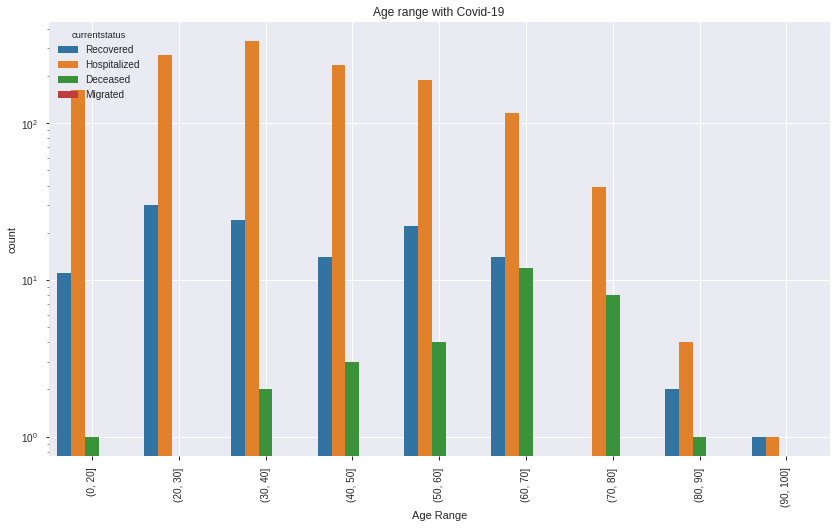

In [123]:
age = df['agebracket']
status = df['currentstatus']
age_bins = [0,20,30,40,50,60,70,80,90,100]
plt.figure(figsize=(14,8))
sns.countplot(x=pd.cut(age, age_bins), hue=status)
plt.xticks(rotation=90)
plt.xlabel("Age Range")
plt.yscale('log')
plt.title("Age range with Covid-19")
plt.grid(True)
plt.show()

## Covid-19 Cases Distribution across States

In [124]:
state = df.groupby('detectedstate').count()
fig = px.pie(state, values='currentstatus', names=state.index
             ,color_discrete_sequence=px.colors.sequential.Plasma_r,title='Covid19 cases based on State')
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()

## Covid-19 cases distribution based on Nationality

In [125]:
nationality = df.groupby('nationality').count()
fig = px.pie(nationality, values='currentstatus', names=nationality.index
             ,color_discrete_sequence=px.colors.qualitative.G10,title='Covid19 cases based on Nationality in India')
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()

## No. of foreign citizens affected by Covid-19 in India

In [126]:
temp = df.groupby('nationality')['patientnumber'].count().reset_index()
temp = temp.sort_values('patientnumber')
temp = temp[temp['nationality']!='']
temp = temp[temp['nationality']!='India']
fig = px.bar(temp, x='patientnumber', y='nationality', orientation='h', text='patientnumber', width=600,
       color_discrete_sequence = ['#35495e'], title='No. of foreign citizens')
fig.update_xaxes(title='')
fig.update_yaxes(title='')
fig.show()

## Covid-19 distribution based on Type of Transmission

In [127]:
temp = pd.DataFrame(df[['typeoftransmission']].groupby('typeoftransmission')['typeoftransmission'].count())
temp = temp.dropna()
temp.columns = ['count']
temp = temp.reset_index().sort_values(by='count')

fig = px.bar(temp, x='count', y='typeoftransmission', orientation='h', text='count', width=600, height=300,
       color_discrete_sequence = ['#35495e'], title='Type of transmission')
fig.update_xaxes(title='')
fig.update_yaxes(title='')
fig.show()

## Covid-19 cases Vs Age Brackets along with current status

In [129]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Cases vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df[['agebracket', 'currentstatus']].dropna()
print('Total no. of values :', df.shape[0], '\nNo. of missing values :', df.shape[0]-temp.shape[0], '\nNo. of available values :', df.shape[0]-(df.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('currentstatus').count()

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Deceased', 'Hospitalized', 'Recovered'], 
                     marker_colors = ['#fd0054', '#393e46', '#40a798'], hole=.3),1, 2)

fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Deceased']['agebracket'], nbinsx=50, name='Deceased', marker_color='#fd0054'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Recovered']['agebracket'], nbinsx=50, name='Recovered', marker_color='#40a798'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Hospitalized']['agebracket'], nbinsx=50, name='Hospitalized', marker_color='#393e46'), 1, 1)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[0].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 12371 
No. of missing values : 10865 
No. of available values : 1506


## Covid-19 cases Gender Vs Age Brackets along with gender distribution

In [130]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Gender vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df[['agebracket', 'gender']].dropna()
print('Total no. of values :', df.shape[0], '\nNo. of missing values :', df.shape[0]-temp.shape[0], '\nNo. of available values :', df.shape[0]-(df.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('gender').count()

fig.add_trace(go.Histogram(x=temp[temp['gender']=='F']['agebracket'], nbinsx=50, name='Female', marker_color='#6a0572'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['gender']=='M']['agebracket'], nbinsx=50, name='Male', marker_color='#39065a'), 1, 1)

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Female', 'Male'], marker_colors = ['#6a0572', '#39065a']),1, 2)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[2].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 12371 
No. of missing values : 10865 
No. of available values : 1506


## Covid-19 cases Age distribution of confirmed patients

In [131]:
print('Total no. of values :', df.shape[0], '\nNo. of missing values :', df.shape[0]-df[['agebracket']].dropna().shape[0],
      '\nNo. of available values :', df.shape[0]-(df.shape[0]-df[['agebracket']].dropna().shape[0]))
px.histogram(df, x='agebracket', color_discrete_sequence = ['#35495e'], nbins=50,
             title='Distribution of ages of confirmed patients')

Total no. of values : 12371 
No. of missing values : 10865 
No. of available values : 1506


## Covid-19 cases distribution across states

In [133]:
dist = df.groupby(['detectedstate', 'detecteddistrict'])['patientnumber'].count().reset_index()
dist.head()
fig = px.treemap(dist, path=["detectedstate", "detecteddistrict"], values="patientnumber", height=700,
           title='Number of Confirmed Cases', color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

TypeError: ignored

In [0]:
df['statuschangedate'] = pd.to_datetime(df['statuschangedate'])
df['dateannounced'] = pd.to_datetime(df['dateannounced'])

In [153]:
temp = df[['dateannounced', 'statuschangedate', 'currentstatus']].dropna()
temp = temp[temp['statuschangedate']!=temp['dateannounced']]
temp['no_of_days'] = temp['statuschangedate'] - temp['dateannounced']
temp['no_of_days'] = temp['no_of_days'].dt.days
temp = temp[temp['no_of_days']>0]


currentstatus
Deceased          78
Hospitalized     447
Migrated           3
Recovered       7130
Name: no_of_days, dtype: int64

In [136]:
print('Total no. of values :', df.shape[0], '\nNo. of missing values :', df.shape[0]-temp.shape[0], '\nNo. of available values :', df.shape[0]-(df.shape[0]-temp.shape[0]))
px.box(temp, x="currentstatus", y="dateannounced", color='currentstatus')


Total no. of values : 12371 
No. of missing values : 12259 
No. of available values : 112


In [101]:
plt.figure(figsize=(12, 6), dpi = 100)
sns.boxplot(x = 'detectedstate', y = 'agebracket', data = df, palette = 'Set1')
plt.xlabel('State / Union Territory')
plt.ylabel('agebracket')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

In [0]:
plt.figure(figsize=(12, 6), dpi = 100)
sns.boxplot(x = 'nationality', y = 'agebracket', data = df, palette = 'viridis')
plt.xlabel('')
plt.xticks(rotation=90) 
plt.ylabel('agebracket')
plt.tight_layout()
plt.show()

### Age Distribution of COVID-19 Recovered Patients


In [100]:
dist = df.groupby(['agebracket','currentstatus'])['patientnumber'].count().reset_index()
dist = dist[dist['currentstatus']=='Recovered']
dist
fig = px.bar(dist, x='agebracket', y='patientnumber', orientation='v', text='patientnumber', width=1200,
       color_discrete_sequence = ['#00CC96'], title='Age distribution of Recovered COVID Patient')

fig.update_xaxes(title='')
fig.update_yaxes(title='')
fig.show()


### Gender Distribution of COVID-19 Recovered Patients

In [92]:
dist = df.groupby(['gender','currentstatus'])['patientnumber'].count().reset_index()
dist = dist[dist['currentstatus']=='Recovered']
dist
fig = px.pie(dist, values=dist['patientnumber'], names=dist.gender
         ,color_discrete_sequence=["#636EFA"],title='Gender distribution of COVID19 Recovered Patients')
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()

In [97]:
df.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported
